# IMPORT STATEMENTS

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')

In [69]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# DATA CLEANING

In [70]:
df=df.drop('Unnamed: 32',axis=1)

In [71]:
df

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]

### Testing for **inconsistencies** in diagnosis column

In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

We find that there are no inconsistent values. All values in the _diagnosis_ column are either M (malignant) or B (benign).

### Testing for **duplicates**

In [6]:
df["id"].is_unique

True

We find that there are no duplicate rows present in the dataset.

### Testing for **incorrect** data

Checking if values are in the expected range

In [7]:
df.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

Checking the datatypes

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Checking for negatives

In [9]:
(df.iloc[:,2:] < 0).any().any()

False

Checking if normal mathematical assumptions hold:

In [10]:
for index, row in df.iterrows():

  #PERIMETER AND RADIUS
  if(row['perimeter_mean']<row['radius_mean']*2*math.pi):
    print("Row:",index,", Perimeter-actual:", row['radius_mean']*2*math.pi-row['perimeter_mean'])

  #AREA AND RADIUS
  if(row['area_mean']<row['radius_mean']**2*math.pi-140):
    # 140 is given as an acceptable difference as std.dev is 351
    print("Row:",index,", Area-actual:", row['radius_mean']**2*math.pi-row['area_mean'])

Row: 101 , Perimeter-actual: 0.0729166294206891
Row: 175 , Perimeter-actual: 0.061499798554187635
Row: 192 , Perimeter-actual: 0.34256118578558414
Row: 307 , Perimeter-actual: 0.18866776461627666
Row: 538 , Perimeter-actual: 0.582739239191028
Row: 568 , Perimeter-actual: 0.8375179837135889


The difference, being minute, has been considered as acceptable.

# DATA SPLITTING

In [72]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]
y=df['diagnosis']
X_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=10)
df_copy = df.copy()
df = X_train.copy()
df

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
567    927241          1  ...          0.4087                  0.12400
295    891923          0  ...          0.2823                  0.06794
91     861799          1  ...          0.2556                  0.06828
1      842517          1  ...          0.2750                  0.08902
94     862028          1  ...          0.2834                  0.08234
..        ...        ...  ...             ...                      ...
369   9012000          1  ...          0.2741                  0.08574
320    894604          0  ...          0.2608                  0.09702
527  91813702          0  ...          0.3110                  0.07592
125     86561          0  ...          0.2364                  0.07182
265  88995002          1  ...          0.2868                  0.08218

[455 rows x 32 columns]

From hereon, _df_ contains the _training dataset_

# SUMMARY STATISTICS

In [12]:
pd.set_option('display.max_rows', 10)
df = df.sort_index(axis=0)
df

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302          1  ...          0.4601                  0.11890
1      842517          1  ...          0.2750                  0.08902
2    84300903          1  ...          0.3613                  0.08758
3    84348301          1  ...          0.6638                  0.17300
4    84358402          1  ...          0.2364                  0.07678
..        ...        ...  ...             ...                      ...
563    926125          1  ...          0.2929                  0.09873
564    926424          1  ...          0.2060                  0.07115
565    926682          1  ...          0.2572                  0.06637
567    927241          1  ...          0.4087                  0.12400
568     92751          0  ...          0.2871                  0.07039

[455 rows x 32 columns]

In [13]:
df.head()

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302          1  ...          0.4601                  0.11890
1    842517          1  ...          0.2750                  0.08902
2  84300903          1  ...          0.3613                  0.08758
3  84348301          1  ...          0.6638                  0.17300
4  84358402          1  ...          0.2364                  0.07678

[5 rows x 32 columns]

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
df.tail()

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
563  926125          1  ...          0.2929                  0.09873
564  926424          1  ...          0.2060                  0.07115
565  926682          1  ...          0.2572                  0.06637
567  927241          1  ...          0.4087                  0.12400
568   92751          0  ...          0.2871                  0.07039

[5 rows x 32 columns]

In [16]:
df.describe(include='all')

id   diagnosis  ...  symmetry_worst  fractal_dimension_worst
count  4.550000e+02  455.000000  ...      455.000000               455.000000
mean   2.966810e+07    0.380220  ...        0.290213                 0.084265
std    1.264462e+08    0.485975  ...        0.058371                 0.018074
min    8.913000e+03    0.000000  ...        0.156500                 0.055040
25%    8.675630e+05    0.000000  ...        0.251350                 0.071945
50%    9.055570e+05    0.000000  ...        0.282700                 0.080520
75%    8.712810e+06    1.000000  ...        0.317750                 0.092130
max    9.113205e+08    1.000000  ...        0.663800                 0.207500

[8 rows x 32 columns]

In [17]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
                          ..
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Length: 32, dtype: int64

No NULL values are present in the dataset

In [18]:
df

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302          1  ...          0.4601                  0.11890
1      842517          1  ...          0.2750                  0.08902
2    84300903          1  ...          0.3613                  0.08758
3    84348301          1  ...          0.6638                  0.17300
4    84358402          1  ...          0.2364                  0.07678
..        ...        ...  ...             ...                      ...
563    926125          1  ...          0.2929                  0.09873
564    926424          1  ...          0.2060                  0.07115
565    926682          1  ...          0.2572                  0.06637
567    927241          1  ...          0.4087                  0.12400
568     92751          0  ...          0.2871                  0.07039

[455 rows x 32 columns]

In [19]:
df.mean()

id                         2.966810e+07
diagnosis                  3.802198e-01
radius_mean                1.424380e+01
texture_mean               1.922193e+01
perimeter_mean             9.280374e+01
                               ...     
compactness_worst          2.593804e-01
concavity_worst            2.756515e-01
concave points_worst       1.168868e-01
symmetry_worst             2.902127e-01
fractal_dimension_worst    8.426473e-02
Length: 32, dtype: float64

In [20]:
df['diagnosis'].value_counts()

0    282
1    173
Name: diagnosis, dtype: int64

# OUTLIER DETECTION

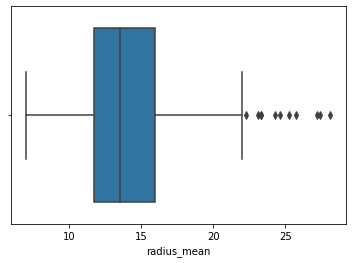

In [21]:
sns.boxplot(df['radius_mean'])

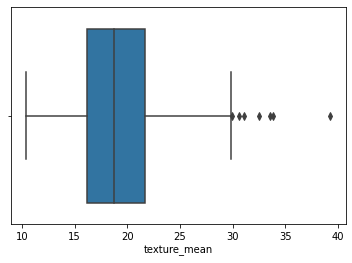

In [22]:
sns.boxplot(df['texture_mean'])

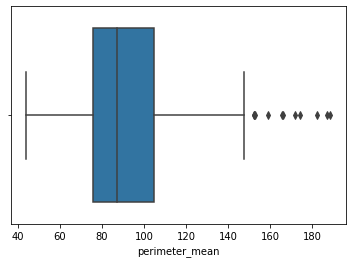

In [23]:
sns.boxplot(df['perimeter_mean'])

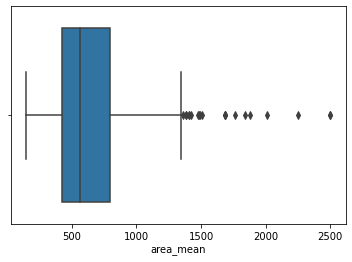

In [24]:
sns.boxplot(df['area_mean'])

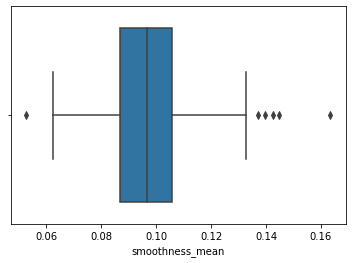

In [25]:
sns.boxplot(df['smoothness_mean'])

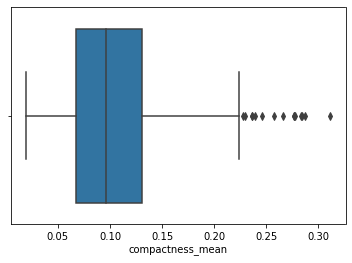

In [26]:
sns.boxplot(df['compactness_mean'])

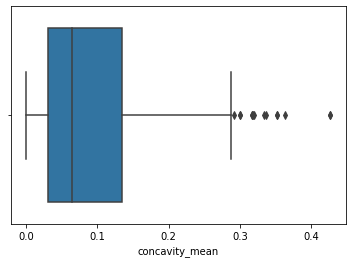

In [27]:
sns.boxplot(df['concavity_mean'])

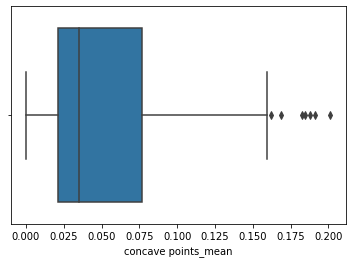

In [28]:
sns.boxplot(df['concave points_mean'])

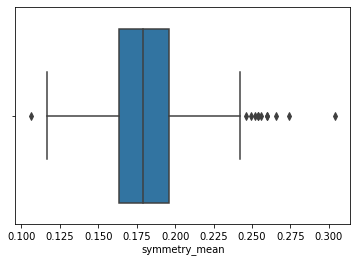

In [29]:
sns.boxplot(df['symmetry_mean'])

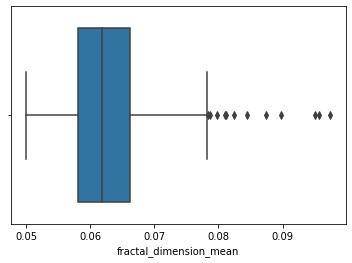

In [30]:
sns.boxplot(df['fractal_dimension_mean'])

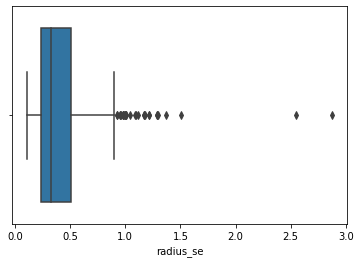

In [31]:
sns.boxplot(df['radius_se'])

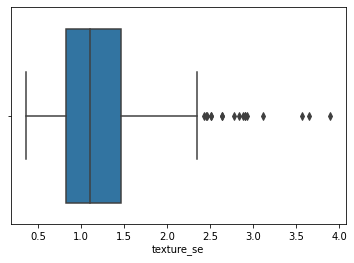

In [32]:
sns.boxplot(df['texture_se'])

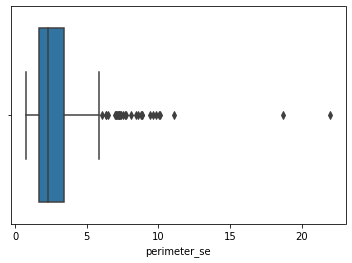

In [33]:
sns.boxplot(df['perimeter_se'])

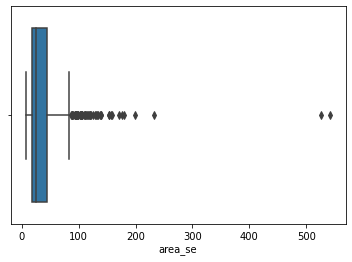

In [34]:
sns.boxplot(df['area_se'])

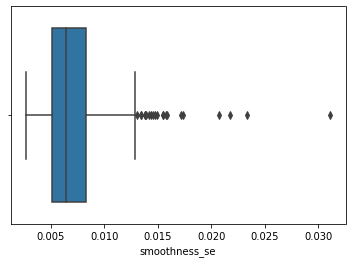

In [35]:
sns.boxplot(df['smoothness_se'])

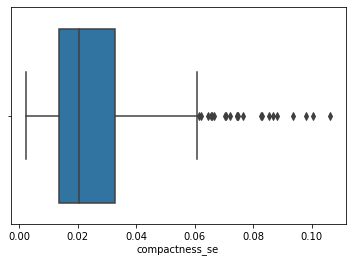

In [36]:
sns.boxplot(df['compactness_se'])

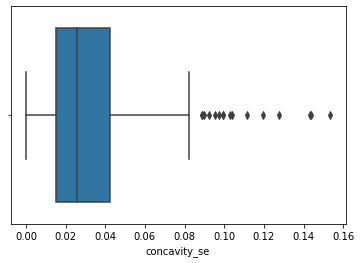

In [37]:
sns.boxplot(df['concavity_se'])

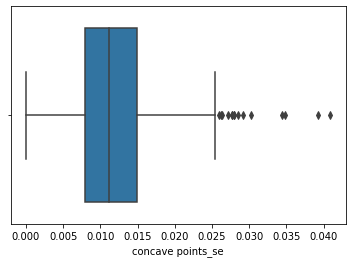

In [38]:
sns.boxplot(df['concave points_se'])

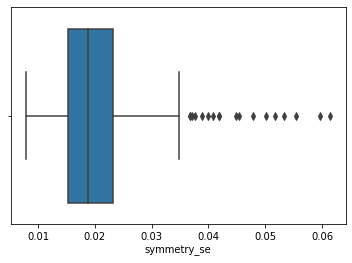

In [39]:
sns.boxplot(df['symmetry_se'])

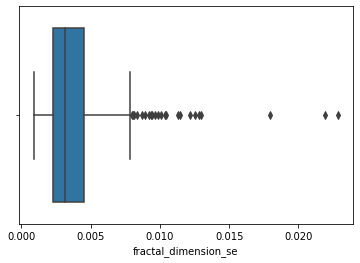

In [40]:
sns.boxplot(df['fractal_dimension_se'])

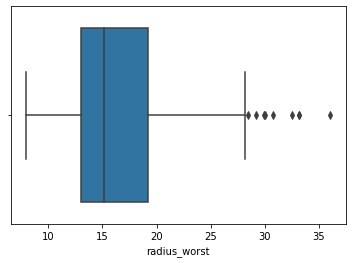

In [41]:
sns.boxplot(df['radius_worst'])

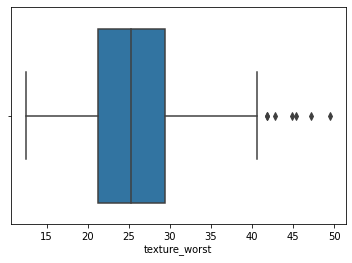

In [42]:
sns.boxplot(df['texture_worst'])

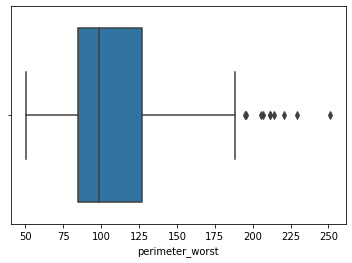

In [43]:
sns.boxplot(df['perimeter_worst'])

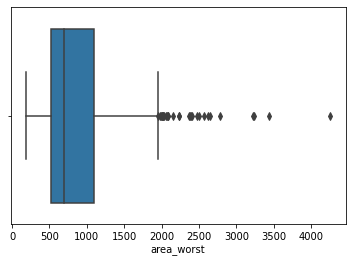

In [44]:
sns.boxplot(df['area_worst'])

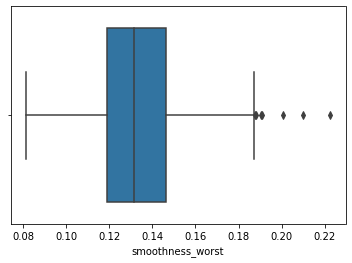

In [45]:
sns.boxplot(df['smoothness_worst'])

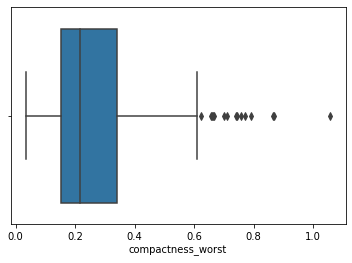

In [46]:
sns.boxplot(df['compactness_worst'])

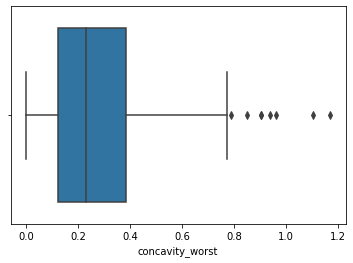

In [47]:
sns.boxplot(df['concavity_worst'])

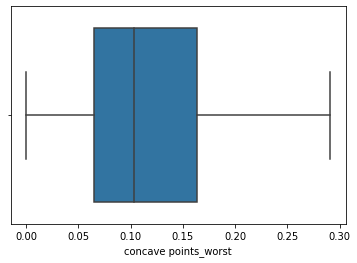

In [48]:
sns.boxplot(df['concave points_worst'])

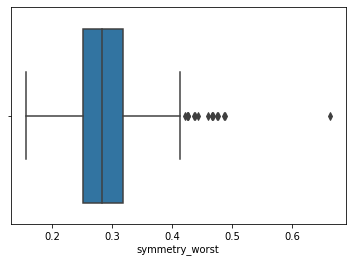

In [49]:
sns.boxplot(df['symmetry_worst'])

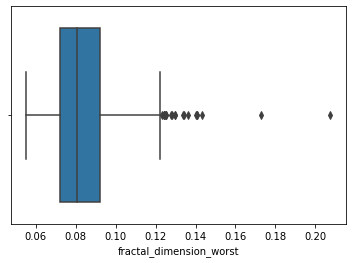

In [50]:
sns.boxplot(df['fractal_dimension_worst'])

The outliers will not be removed as they can give valuable insights

# DATA VISUALIZATION PRE-NORMALIZING

In [51]:
df_numeric = df.iloc[:,2:]
df_numeric.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [73]:
df_numeric_withDiag = df.iloc[:,1:]
df_numeric_withDiag.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

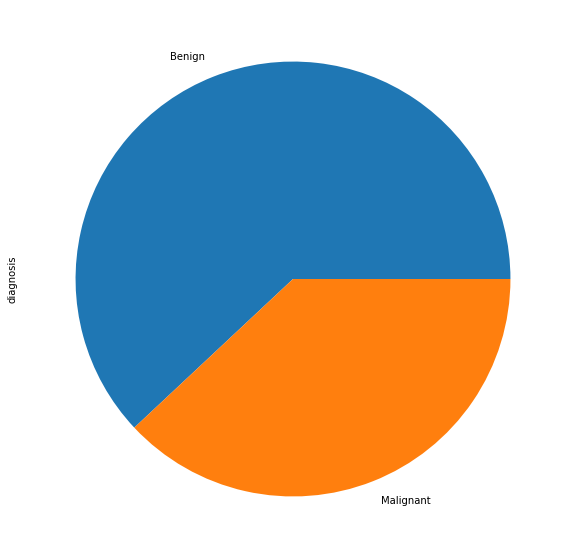

In [52]:
df['diagnosis'].value_counts().plot(kind='pie', figsize=(10,10), labels=['Benign','Malignant'])
plt.grid(b=True, which='both')

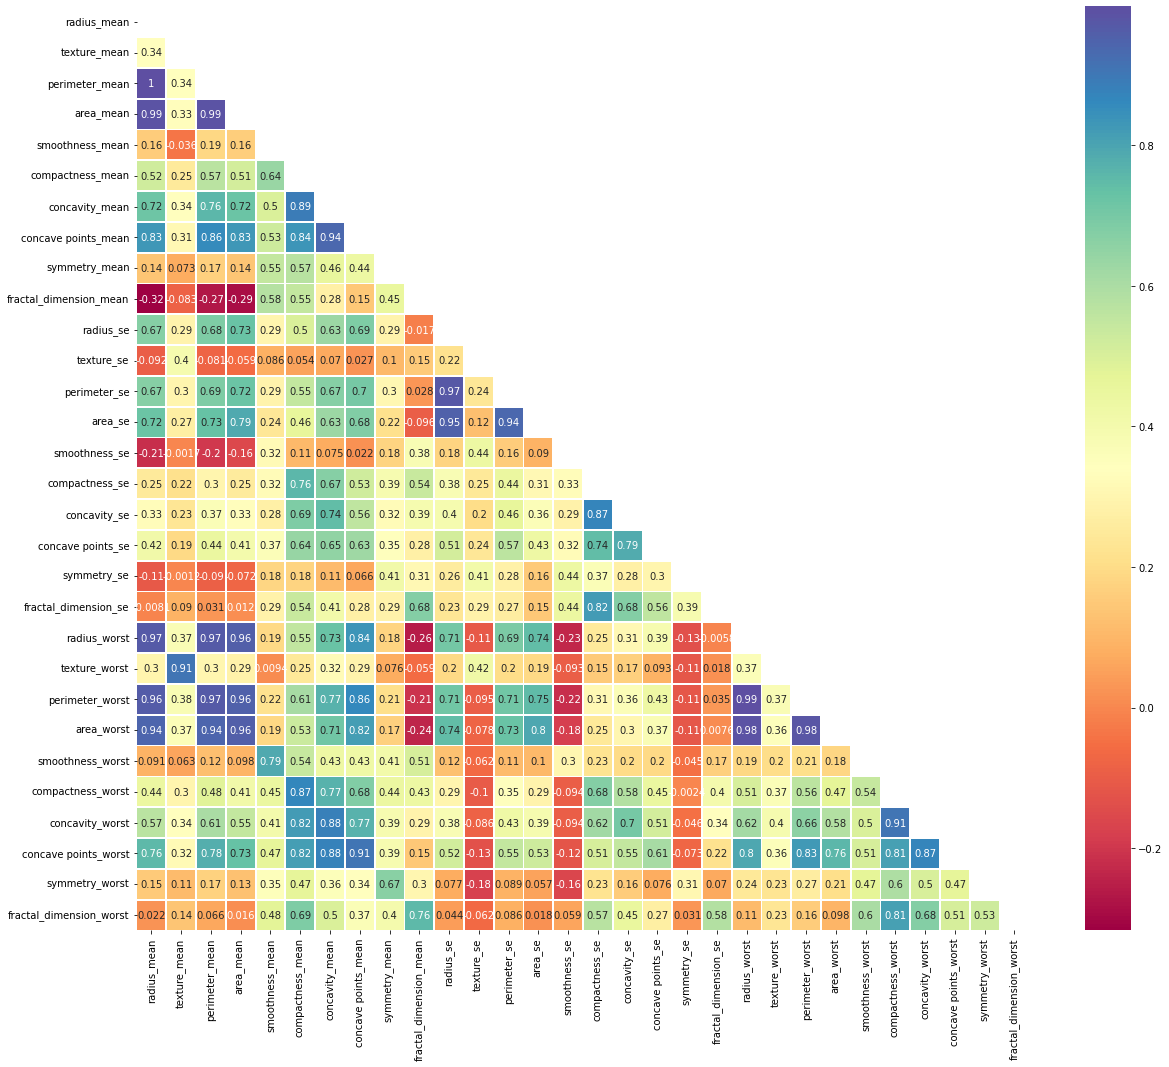

In [53]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_numeric.corr())
sns.heatmap(df_numeric.corr(), annot=True, linewidth=.8, mask=matrix, cmap="Spectral");

Including the _Diagnosis_ column for plotting the heatmap

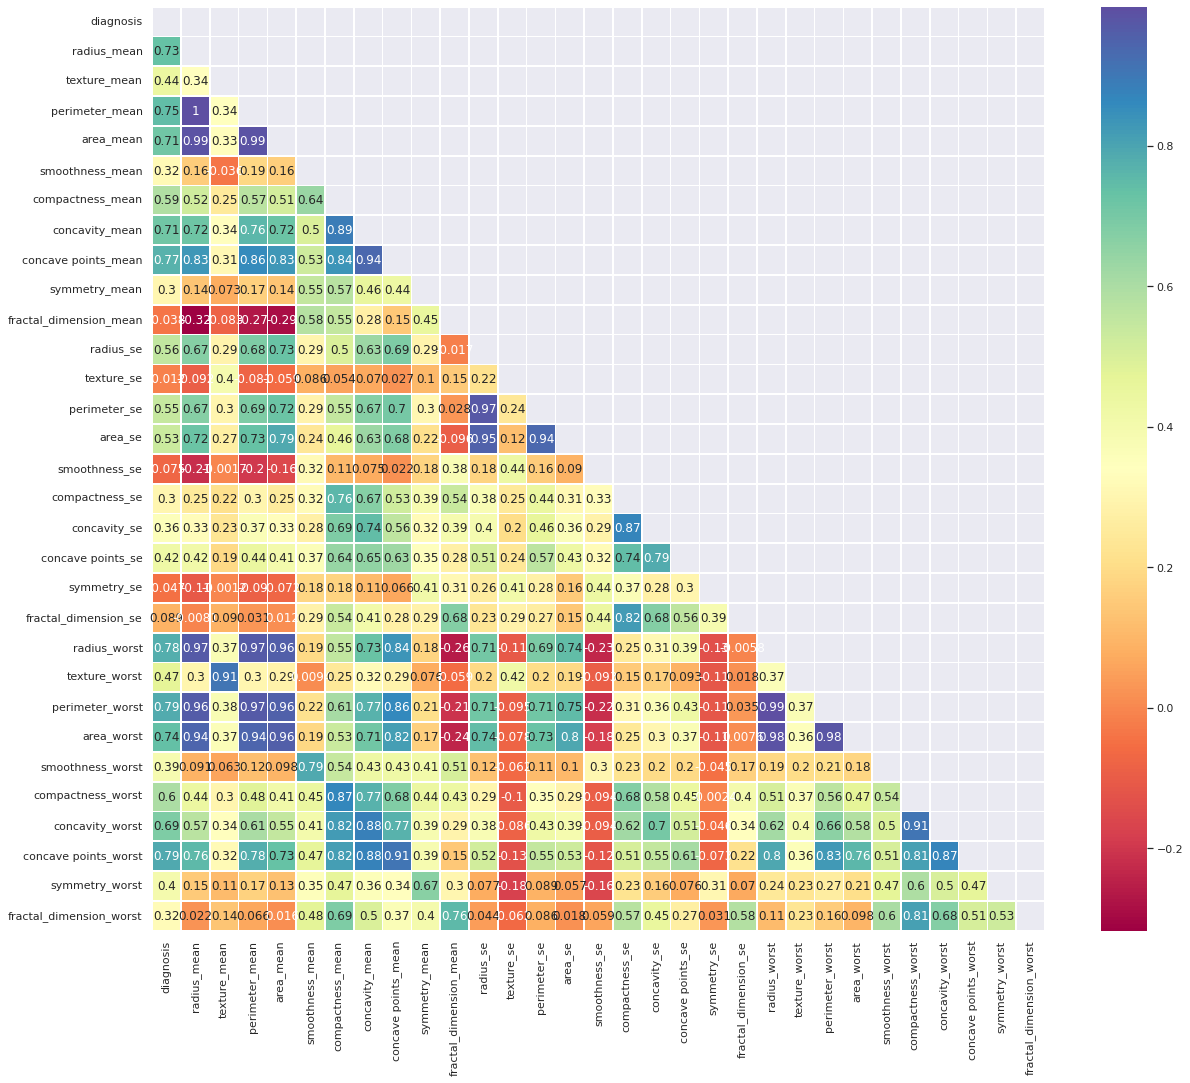

In [75]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_numeric_withDiag.corr())
hm = sns.heatmap(df_numeric_withDiag.corr(), annot=True, linewidth=.8, mask=matrix, cmap="Spectral");
figure = hm.get_figure()    
figure.savefig('heatmap.png', dpi=400)

In [55]:
# List of means
mean_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# list of worsts
worst_columns = ['diagnosis', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

# list of se
se_columns = ['diagnosis', 'radius_se', 'texture_se',
              'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se',
              'symmetry_se', 'fractal_dimension_se']

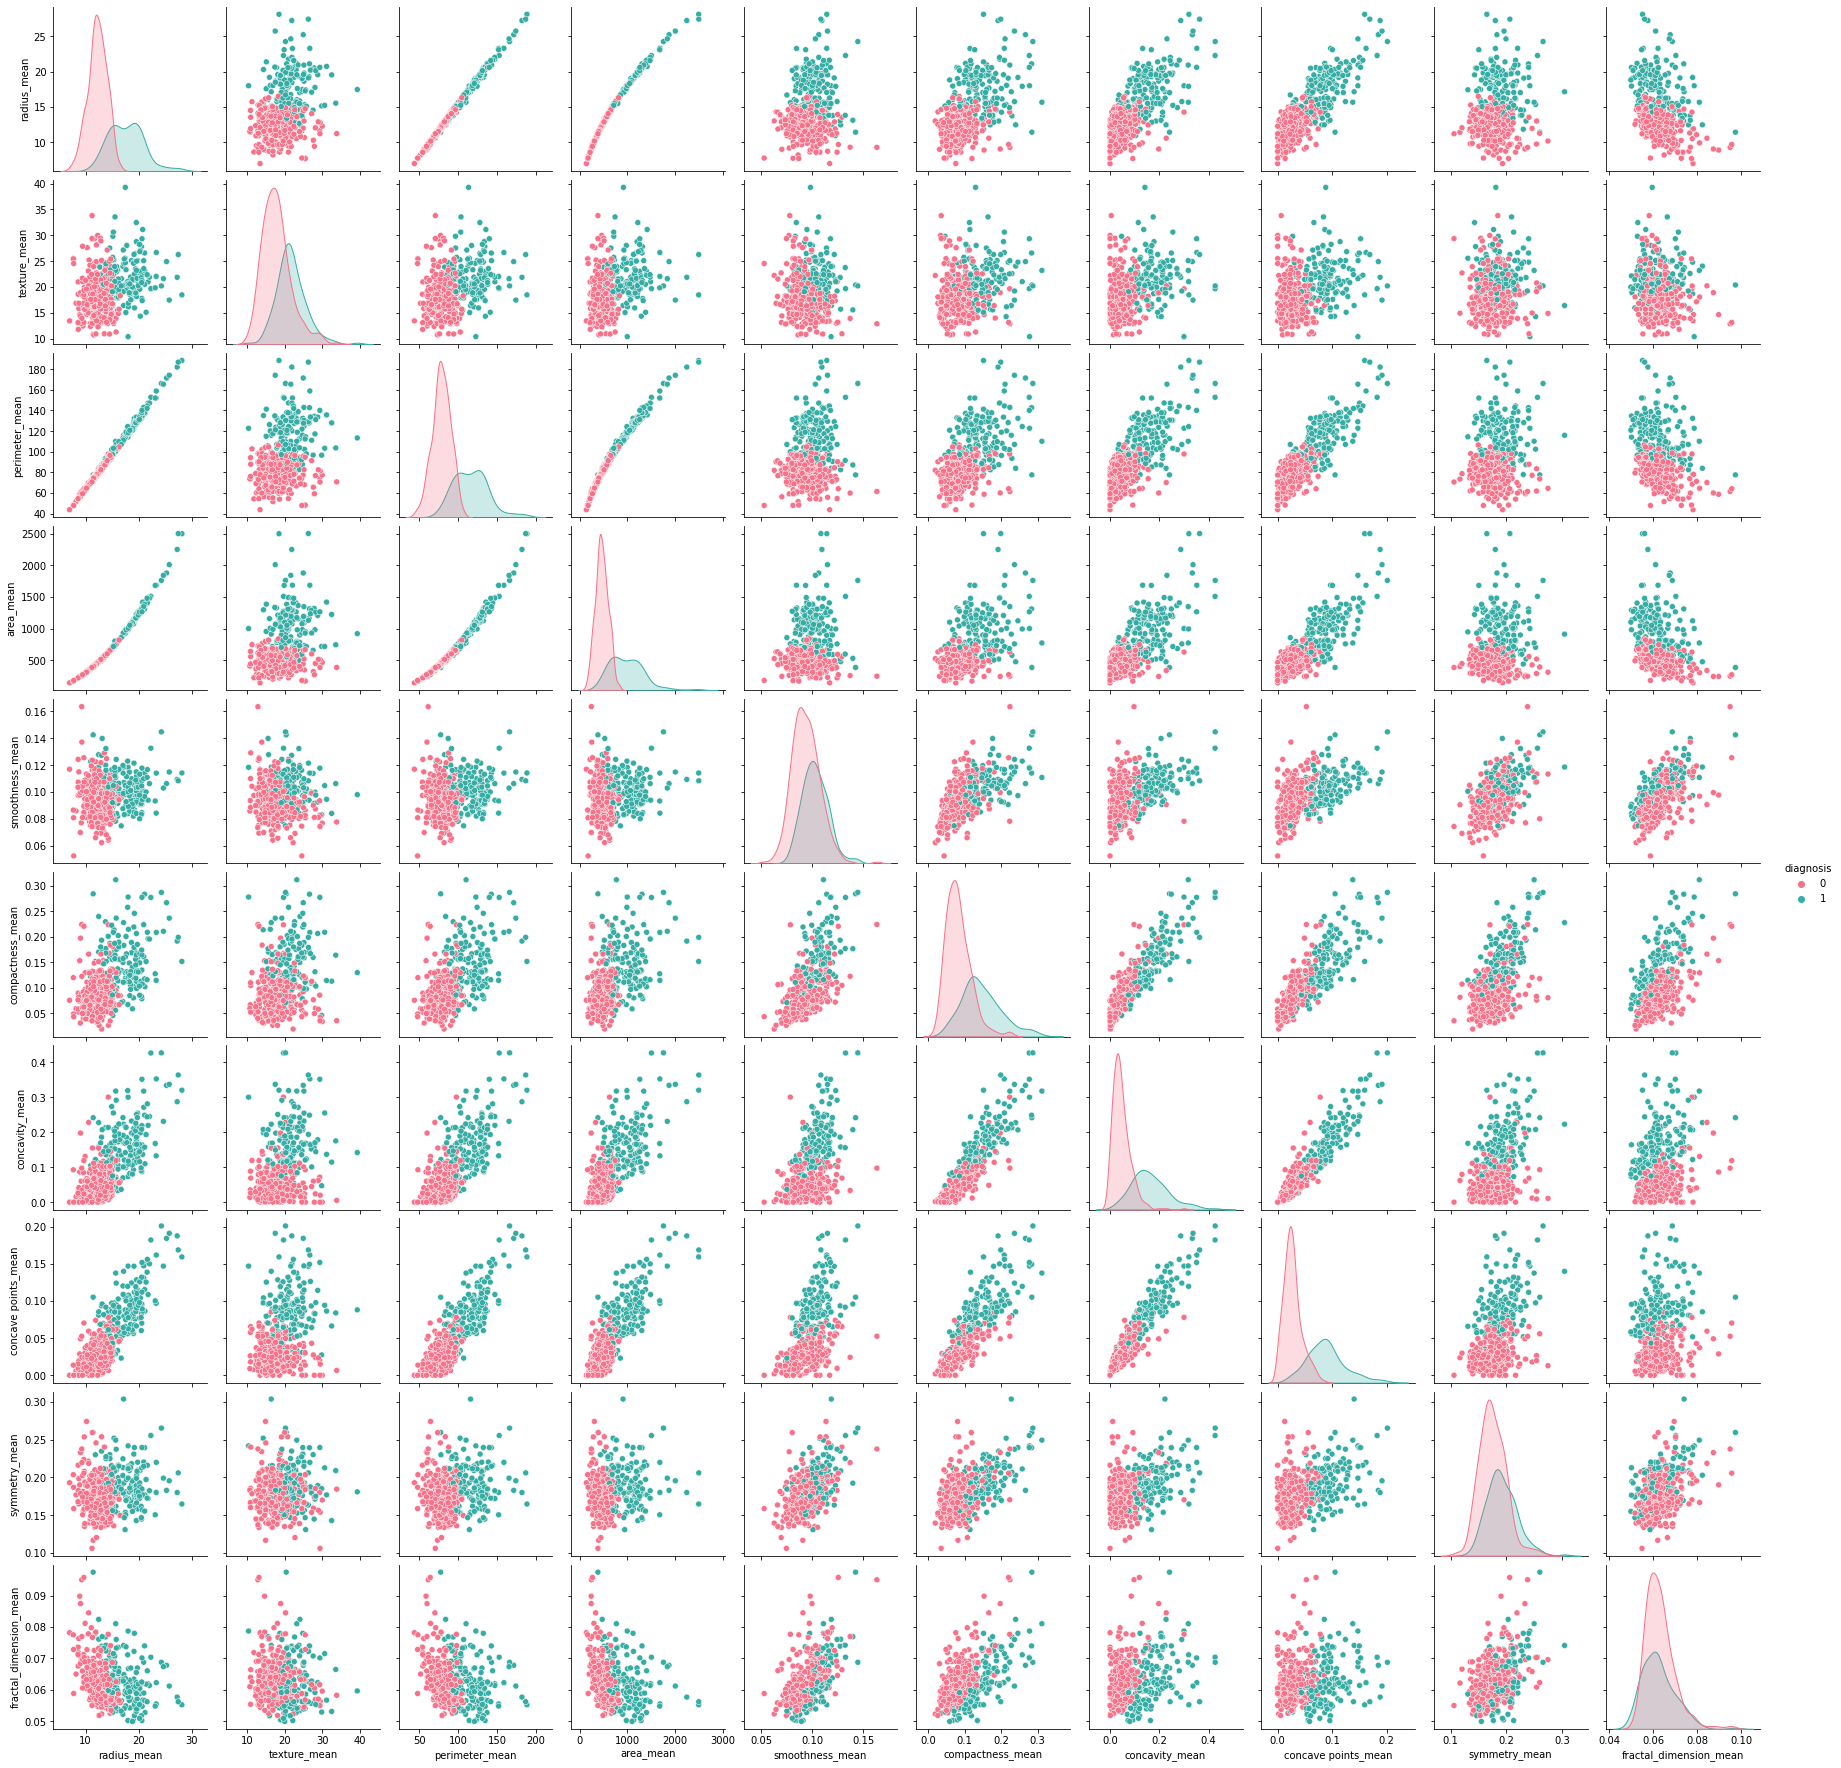

In [56]:
sns_plot = sns.pairplot(df[mean_columns],hue='diagnosis',palette="husl")
sns_plot.savefig("pairplot_mean.png")

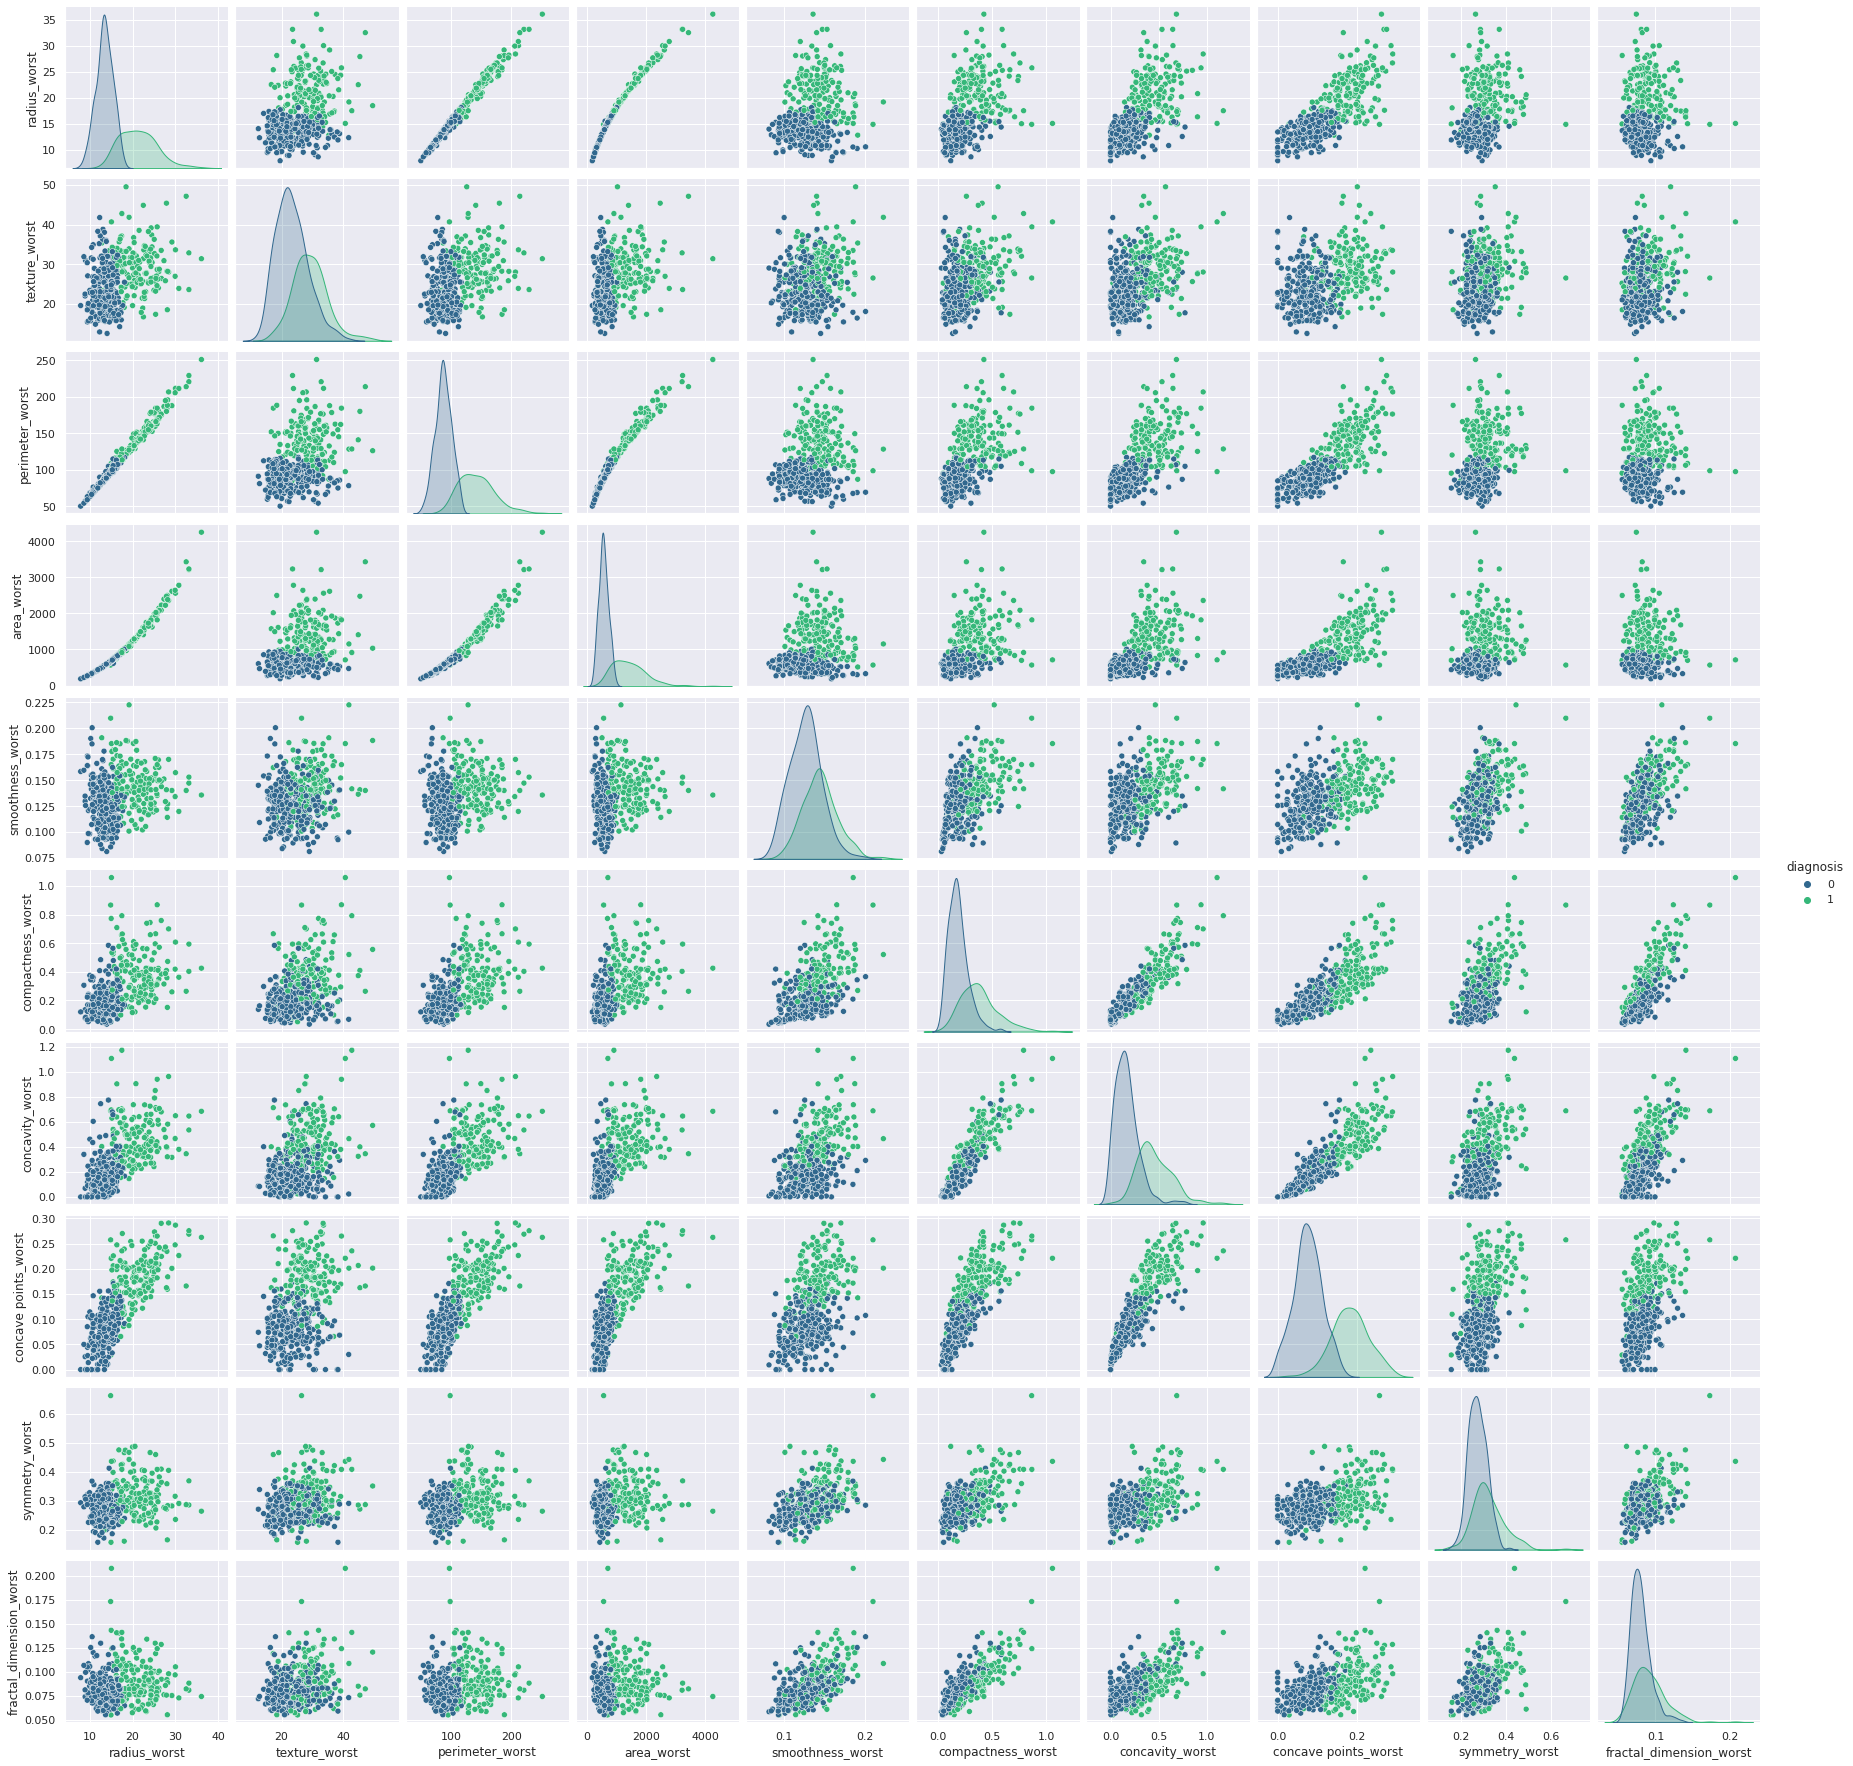

In [ ]:
sns_plot = sns.pairplot(df[worst_columns],hue='diagnosis',palette="viridis")
sns_plot.savefig("pairplot_worst.png")

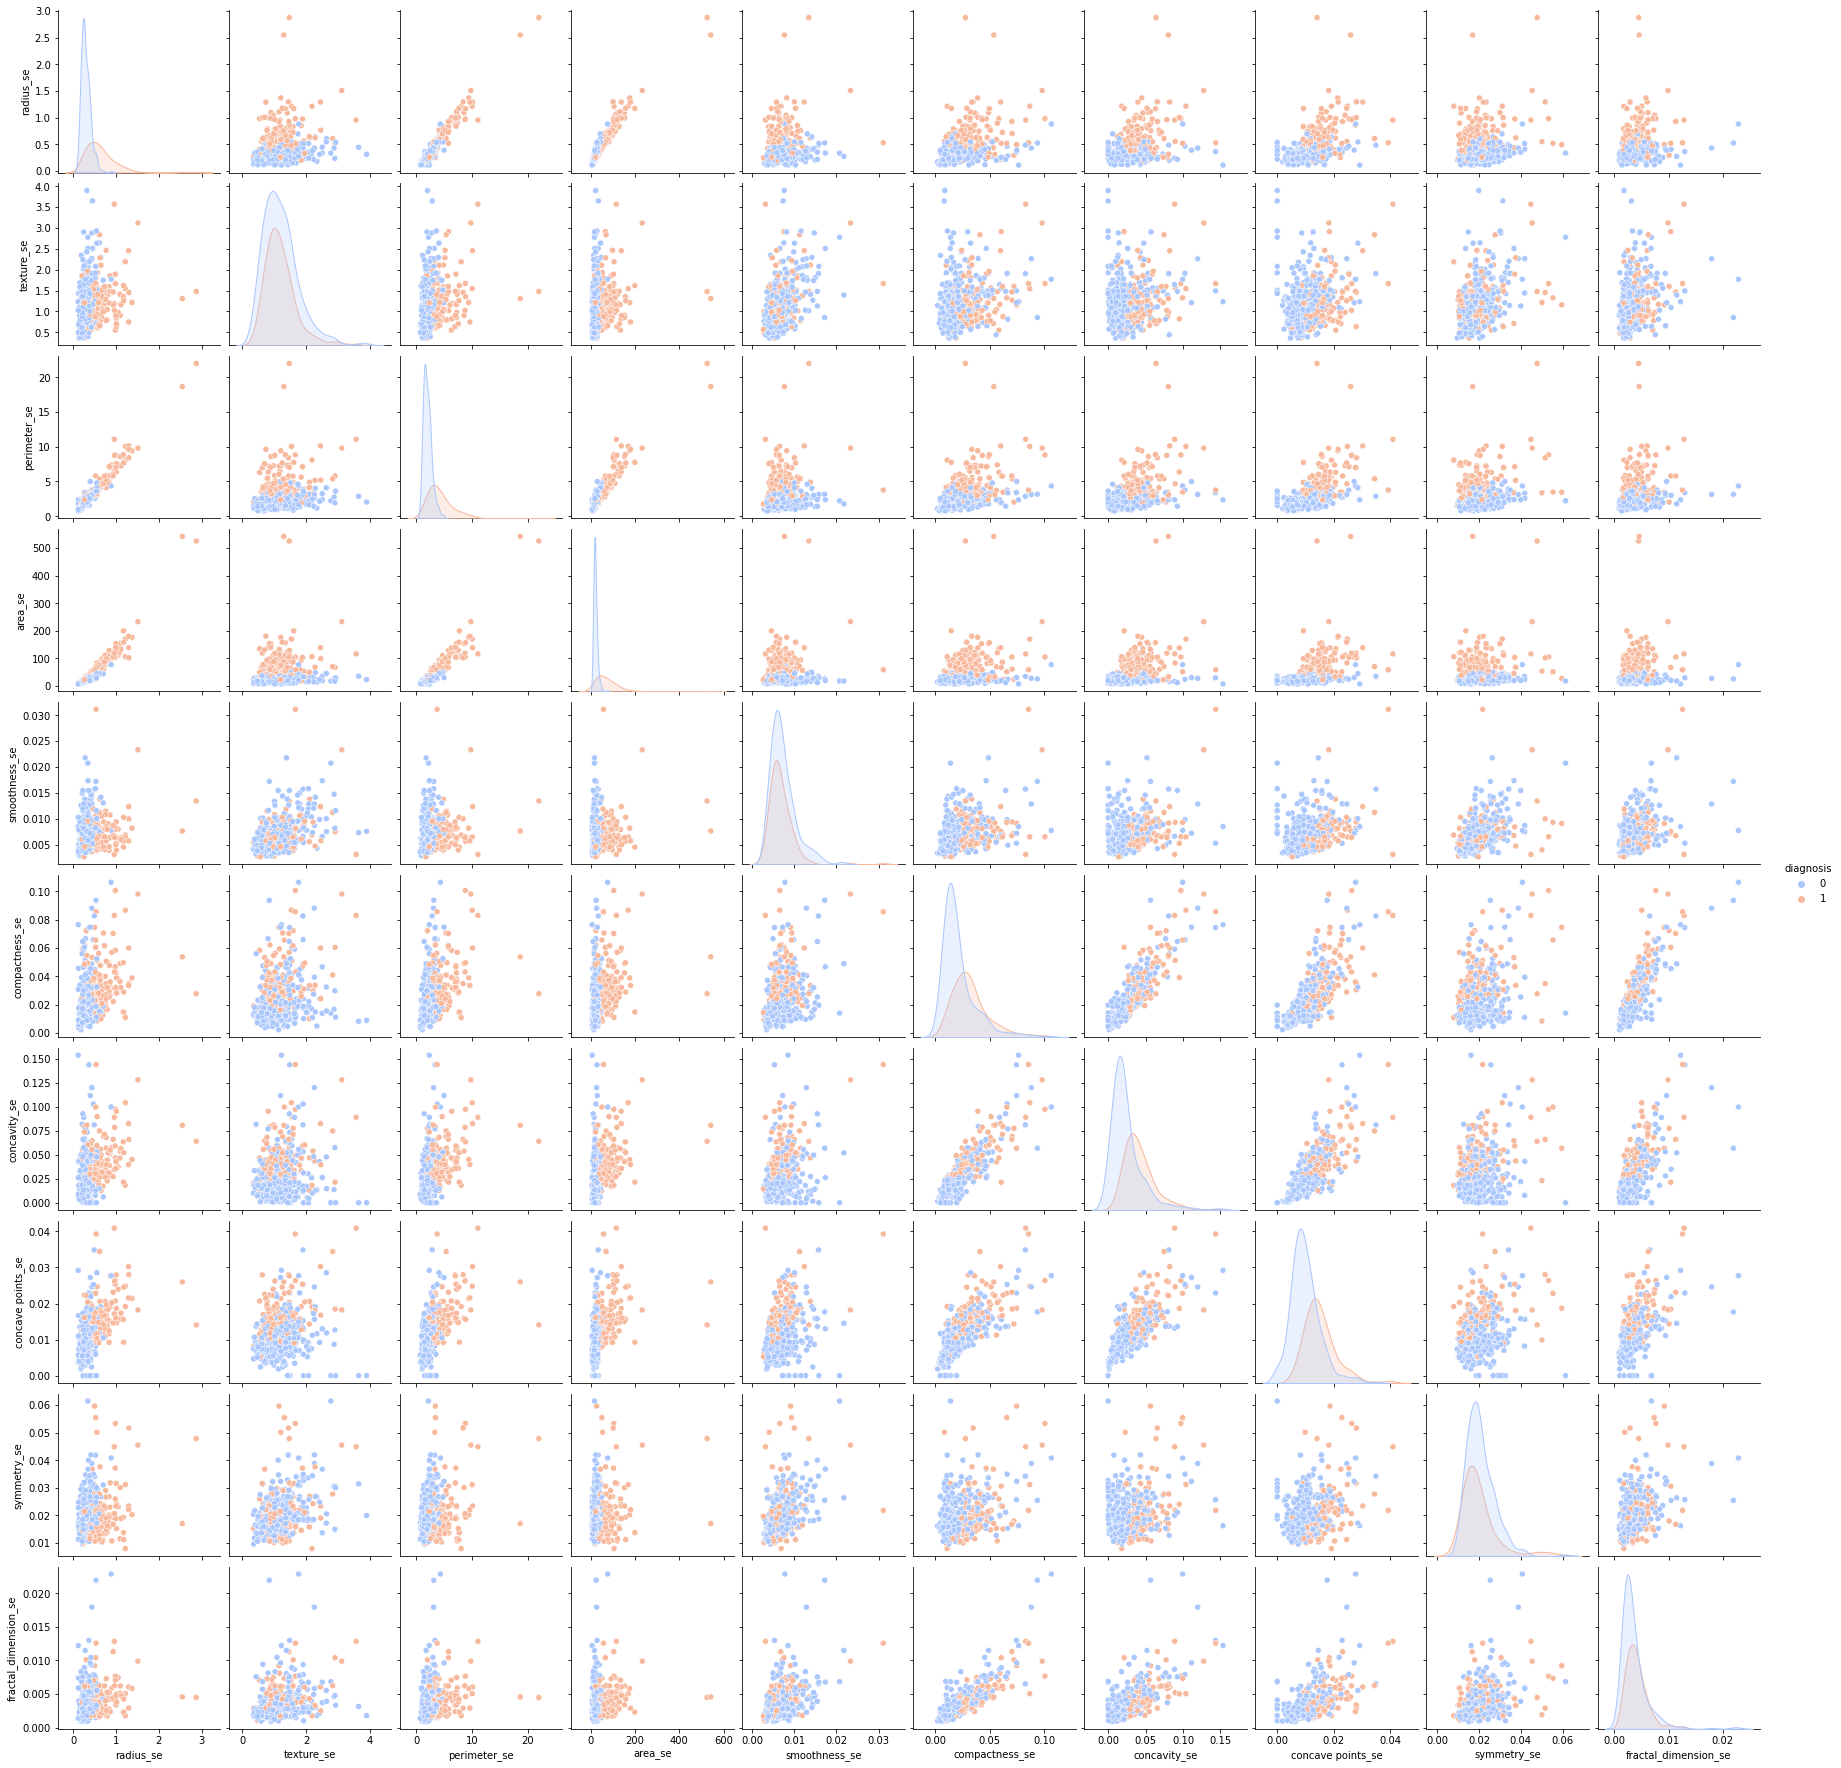

In [57]:
sns_plot = sns.pairplot(df[se_columns],hue='diagnosis',palette="coolwarm")
sns_plot.savefig("pairplot_se.png")

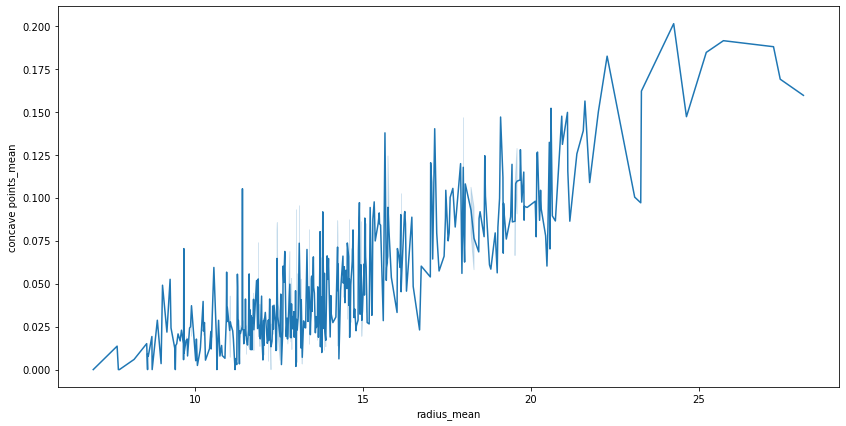

In [58]:
plt.figure(figsize=(14,7))
sns.lineplot(x='radius_mean',y='concave points_mean',data=df)

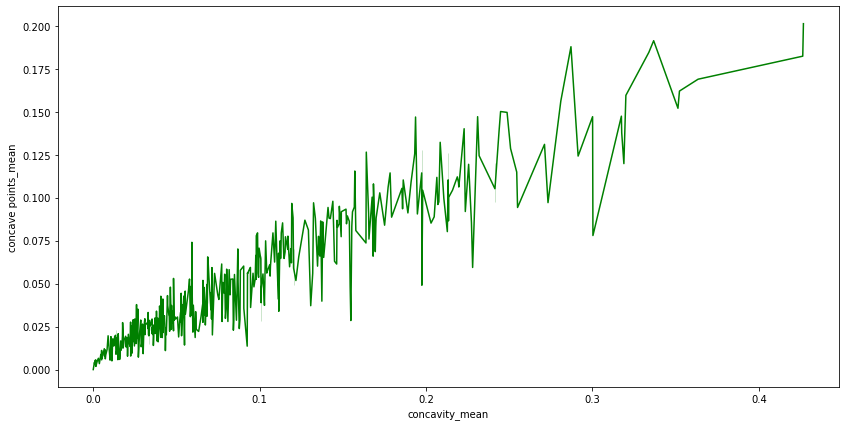

In [59]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "concavity_mean",y = "concave points_mean",data = df, color='green')

# NORMALIZATION

In [60]:
df_normalised = df.iloc[:,2:]

for column in df_numeric:
    df_normalised[column] = df_normalised[column]  / df_normalised[column].abs().max()
      

df_normalised.insert(0,'id',df['id'])
df_normalised.insert(1,'diagnosis',df['diagnosis'])

# view normalized data
display(df_normalised)

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302          1  ...        0.693130                 0.573012
1      842517          1  ...        0.414281                 0.429012
2    84300903          1  ...        0.544290                 0.422072
3    84348301          1  ...        1.000000                 0.833735
4    84358402          1  ...        0.356131                 0.370024
..        ...        ...  ...             ...                      ...
563    926125          1  ...        0.441247                 0.475807
564    926424          1  ...        0.310334                 0.342892
565    926682          1  ...        0.387466                 0.319855
567    927241          1  ...        0.615697                 0.597590
568     92751          0  ...        0.432510                 0.339229

[455 rows x 32 columns]

In [61]:
df_normalised.describe()

id   diagnosis  ...  symmetry_worst  fractal_dimension_worst
count  4.550000e+02  455.000000  ...      455.000000               455.000000
mean   2.966810e+07    0.380220  ...        0.437199                 0.406095
std    1.264462e+08    0.485975  ...        0.087934                 0.087104
min    8.913000e+03    0.000000  ...        0.235764                 0.265253
25%    8.675630e+05    0.000000  ...        0.378653                 0.346723
50%    9.055570e+05    0.000000  ...        0.425881                 0.388048
75%    8.712810e+06    1.000000  ...        0.478683                 0.444000
max    9.113205e+08    1.000000  ...        1.000000                 1.000000

[8 rows x 32 columns]

# DATA VIZ POST-NORMALIZING

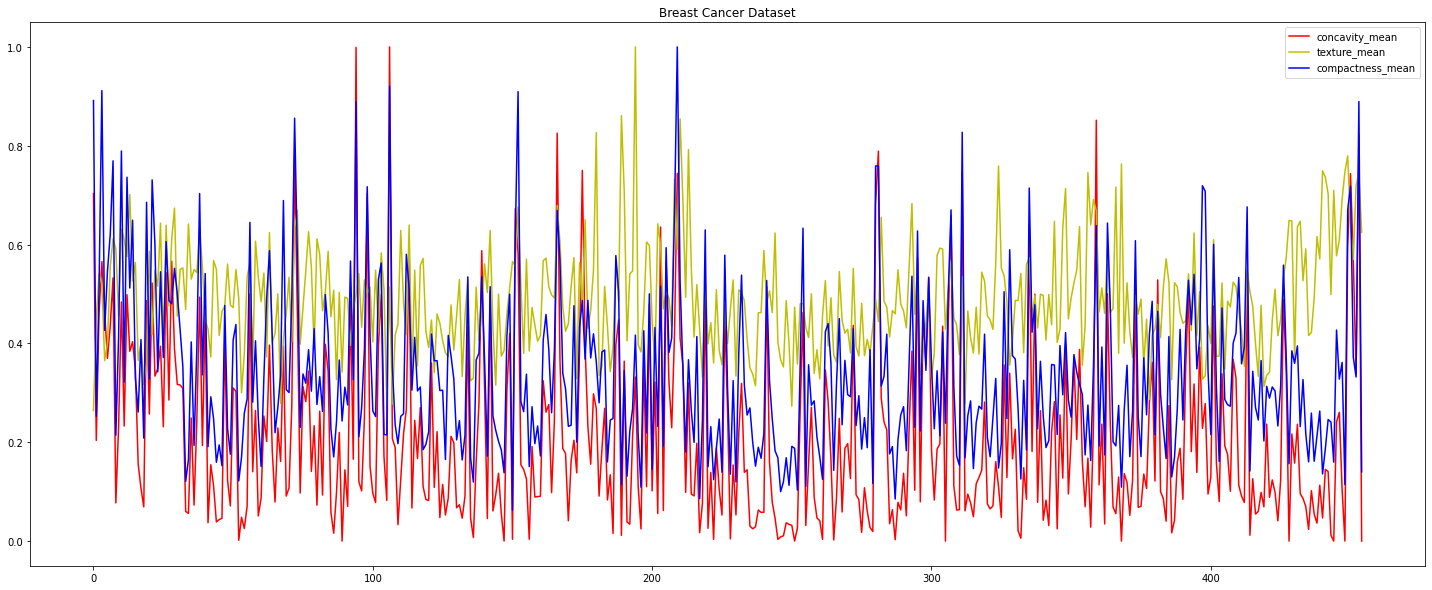

In [62]:
# get columns to plot
mean_cols_2 = ['concavity_mean', 'texture_mean','compactness_mean']
# create x data

x_data = range(0, df_normalised.shape[0])
# create figure and axis
fig, ax = plt.subplots(figsize=(25,10))
color = ['r','y','b']
# plot each column
for i in range(0,len(mean_cols_2)):
    ax.plot(x_data, df_normalised[mean_cols_2[i]], color[i], label=mean_cols_2[i])
# set title and legend
ax.set_title('Breast Cancer Dataset')
ax.legend()

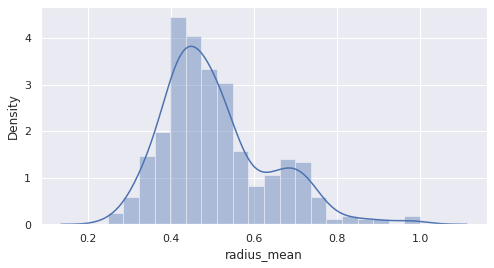

In [63]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(df_normalised['radius_mean'])
plt.show()

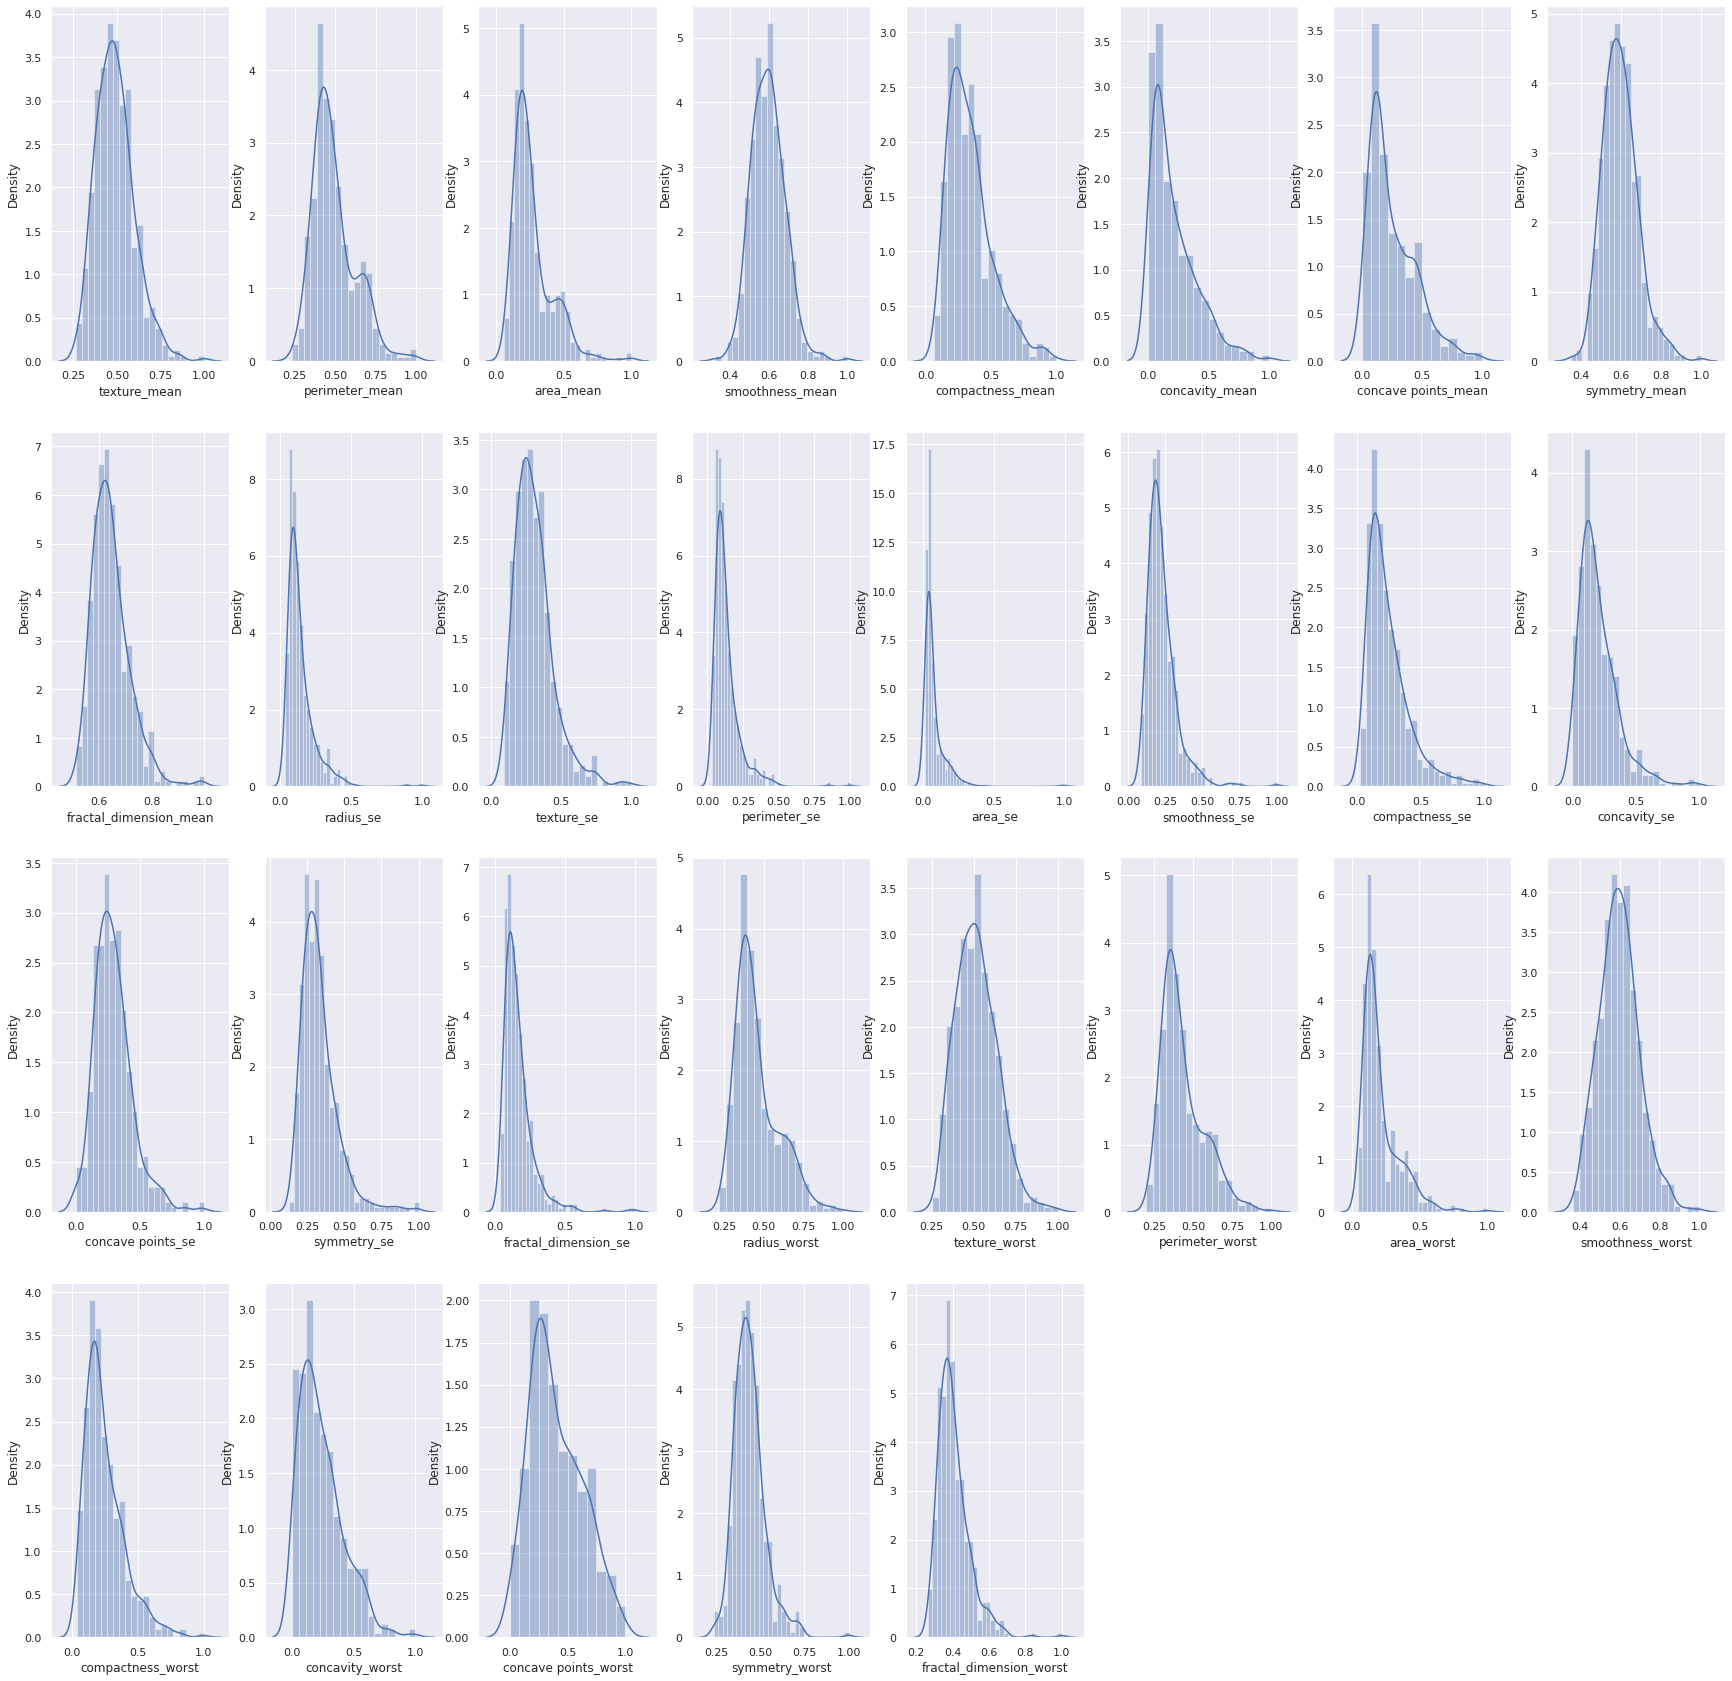

In [64]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(30,30))
for i in range(1,len(df.columns)-2):
  plt.subplot(4,8,i)
  ax = sns.distplot(df_normalised[df_normalised.columns[i+2]])

plt.show()

Mean_malignant VS mean_benign

<Figure size 2160x2160 with 0 Axes>

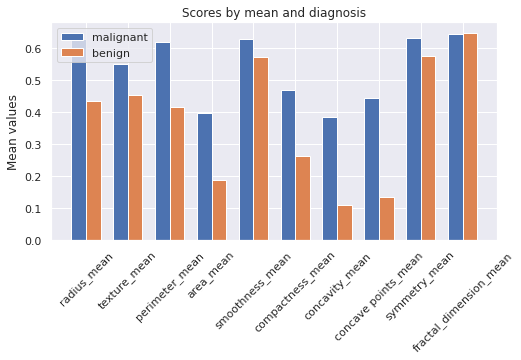

In [65]:
p = df_normalised.groupby('diagnosis').mean()
labels = mean_columns[1:]
malignant = [p[i][1] for i in labels]
benign = [p[i][0] for i in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(30,30))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malignant , width, label='malignant')
rects2 = ax.bar(x + width/2, benign, width, label='benign')

ax.set_ylabel('Mean values')
ax.set_title('Scores by mean and diagnosis')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

Worst_benign VS average_malignant

<Figure size 2160x2160 with 0 Axes>

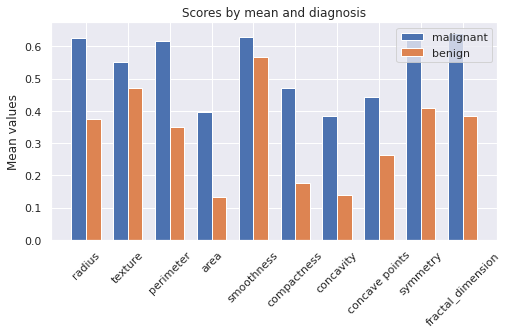

In [66]:
p = df_normalised.groupby('diagnosis').mean()
labels = mean_columns[1:]

malignant = [p[i][1] for i in labels]
benign = [p[i][0] for i in worst_columns[1:]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(30,30))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malignant , width, label='malignant')
rects2 = ax.bar(x + width/2, benign, width, label='benign')

ax.set_ylabel('Mean values')
ax.set_title('Scores by mean and diagnosis')
ax.set_xticks(x)
ax.set_xticklabels(list(map(lambda x:x[:-5], labels)), rotation=45)
ax.legend()

plt.show()

# PCA or Feature Selection

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_normalised.iloc[:,2:])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['col1', 'col2','col3','col4','col5','col6','col7','col8','col9','col10'])
finalDf = pd.concat([principalDf, df_normalised[['diagnosis']]], axis = 1)
finalDf

col1      col2      col3  ...      col9     col10  diagnosis
0    1.321043  0.156087 -0.197627  ...  0.051391 -0.157430        1.0
1    0.316406 -0.535602  0.025765  ...  0.029352  0.087977        1.0
2    0.870488 -0.145427 -0.029634  ...  0.028643  0.024946        1.0
3    1.005727  1.044418 -0.433736  ...  0.004007  0.080490        1.0
4    0.586575 -0.214160  0.174443  ... -0.063183  0.094242        1.0
..        ...       ...       ...  ...       ...       ...        ...
563       NaN       NaN       NaN  ...       NaN       NaN        1.0
564       NaN       NaN       NaN  ...       NaN       NaN        1.0
565       NaN       NaN       NaN  ...       NaN       NaN        1.0
567       NaN       NaN       NaN  ...       NaN       NaN        1.0
568       NaN       NaN       NaN  ...       NaN       NaN        0.0

[554 rows x 11 columns]

Based on an elementary analysis of the logical meaning of each of the attributes, we can reasonably claim that the columns that give the "_mean values_" hold more information for our analysis compared to the "_standard errors_" and "_worst_" values of each. However, we will be retaining these attributes till we gain a better understanding of the domain.